# Introduction

In this lab, we will use Scikit-Learn's **VotingClassifier** to predict the class of iris flowers based on two features. We will compare the predictions of **DecisionTreeClassifier**, **KNeighborsClassifier**, and **SVC** classifiers individually, and then use **VotingClassifier** to combine their predictions and see if we get better results.

# Load the Data

We will load the iris dataset using Scikit-Learn's **datasets** module. We will only use two features: sepal length and petal length.

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Train the Classifiers

We will initialize three classifiers: **DecisionTreeClassifier**, **KNeighborsClassifier**, and **SVC**. Then, we will initialize a **VotingClassifier** with these three classifiers and use it to predict the class of the iris flowers.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel='rbf', probability=True)

eclf = VotingClassifier(
    estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
    voting='soft',
    weights=[2, 1, 2],
)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=4)),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('svc', SVC(gamma=0.1, probability=True))],
                 voting='soft', weights=[2, 1, 2])

# Plot the Decision Boundaries

We will plot the decision boundaries for each classifier and the **VotingClassifier**.

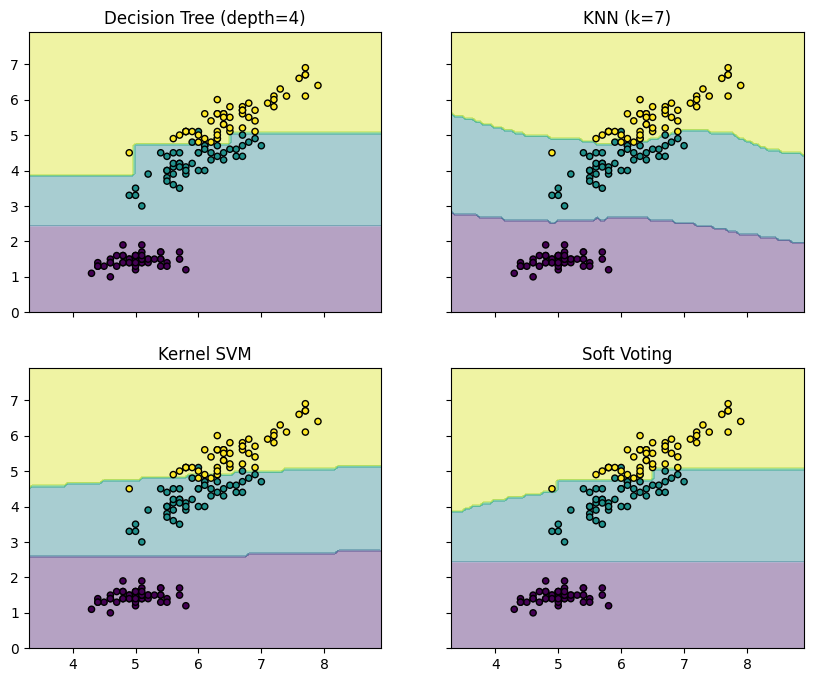

In [3]:
import matplotlib.pyplot as plt
from itertools import product
from sklearn.inspection import DecisionBoundaryDisplay

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X=X,
        alpha=0.4,
        ax=axarr[idx[0], idx[1]],
        response_method='predict'
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

# Interpret the Results

We can see that the decision boundaries for the **DecisionTreeClassifier** and **KNeighborsClassifier** are relatively simple, while the **SVC** decision boundary is more complex. The **VotingClassifier** decision boundary is similar to the **SVC** decision boundary, but with less complexity in some areas.

# Summary

In this lab, we used Scikit-Learn's **VotingClassifier** to predict the class of iris flowers based on two features. We trained three classifiers: **DecisionTreeClassifier**, **KNeighborsClassifier**, and **SVC**. We then used **VotingClassifier** to combine their predictions and plotted the decision boundaries. We saw that the **VotingClassifier** decision boundary was similar to the SVC decision boundary, but with less complexity in some areas.